<a href="https://colab.research.google.com/github/marynell-rg/Detecci-n-Anomal-as-en-Vinos/blob/main/Detecci%C3%B3n_de_Anomal%C3%ADas_en_Lotes_de_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de Anomalías en Lotes de Vino**

Se requiere desarrollar un sistema para identificar lotes de vino que presentan características atípicas y que podrían indicar problemas en el proceso de producción, para evitar sacar al mercado lotes de vino sin la calidad especificada. Esto traería un gran impacto positivo a nivel económico, reduciendo los costos de reproceso.

## Objetivo

Detectar posibles desviaciones en la calidad del vino durante el proceso de producción.

# ¿Como será usada la solución?
En la actualidad se dificulta la detección temprana de los lotes defectuosos, trayendo con esto, pérdidas cuantiosas. Contar con un sistema inteligente que permita identificar desviaciones en la fase de producción del vino disminuirá de manera significativa dichas pérdidas.

# ¿Como son las soluciones actuales?
No existe una metodologia de detección temprana que pueda predecir cuando un lote de vino no estará dentro de los parametros documentados.

# Marco del problema
Se cuenta con datos presentados en forma tabular, la cual muestra diferentes caraceristicas fisico-quimicas del vino debidamente identificadas, por lo que los datos disponibles son supervisados y serán utilizados para desarrollar un sistema que permita clasificar los lotes de vino como buenos y posibles defectuosos durante el proceso de producción, para ejercer las acciones correctivas con anticipación, y de esta manera evitar sacar al mercado lotes de vino sin la calidad especificada.

# Medición del rendimiento
Se considerará que el modelo esta bien entrenado y es confiable, cuando su tasa de predicción sea igual o mayor al 90% de aciertos sobre los lotes no aptos.

# Alineación con los objetivos empresariales
La empresa requiere disminuir costos de reproceso, y utilizar éste excedente en la ampliación del negocio

# Rendimiento mínimo necesario
Se considerará que el modelo es aceptable cuando prediga un mínimo de 87% de las veces que los lotes pueden estar defectuosos.

# Fuente de los datos
 P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# Datos
A continuación importamos las librerias necesarias para poder manipular los datos

In [ ]:
#Para limpiar datos
import pandas as pd

#Para operaciones matematicas y estadisticas
import numpy as np

#Para visualizar datos
import seaborn as sns

#Para visualizar datos
import matplotlib.pyplot as plt

Los datos estan disponibles en formato CSV y se importarán utilizando el siguiente código

In [ ]:
wine_data = pd.read_csv ("winequality-red.csv")

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# Exploración y Análisis de los Datos

In [ ]:
#Información sobre los datos
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Resumen estadistico asociado a cada característica estudiada
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Gráficos de Distribución de cada variable

<function matplotlib.pyplot.show(close=None, block=None)>

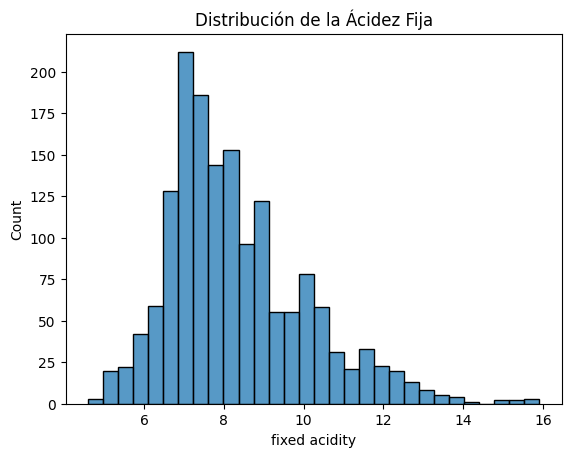

In [ ]:
sns.histplot(wine_data['fixed acidity'], bins=30)
plt.title('Distribución de la Ácidez Fija')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

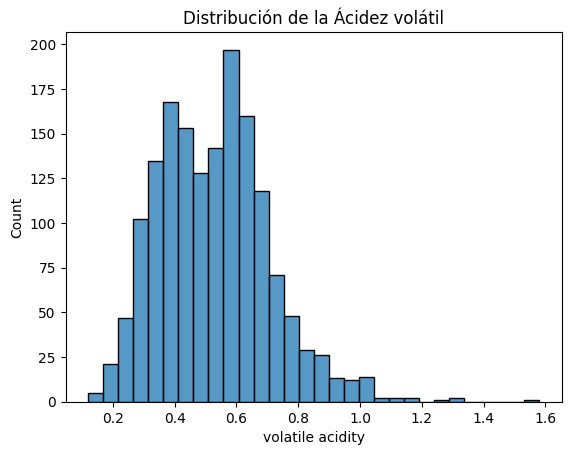

In [ ]:
sns.histplot(wine_data['volatile acidity'], bins=30)
plt.title('Distribución de la Ácidez volátil')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

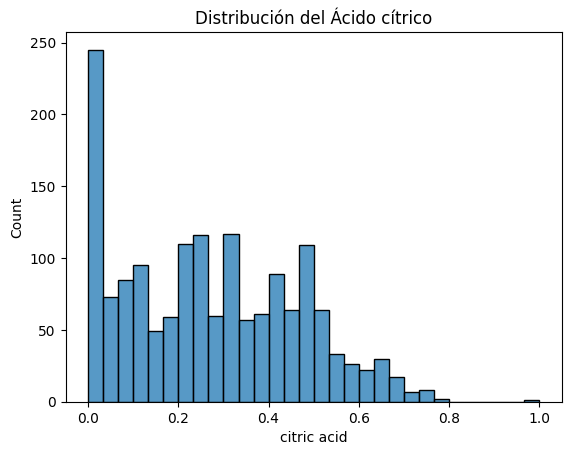

In [ ]:
sns.histplot(wine_data['citric acid'], bins=30)
plt.title('Distribución del Ácido cítrico')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

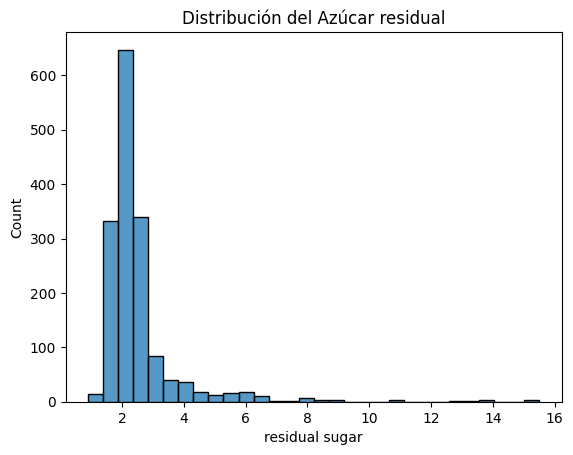

In [ ]:
sns.histplot(wine_data['residual sugar'], bins=30)
plt.title('Distribución del Azúcar residual')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

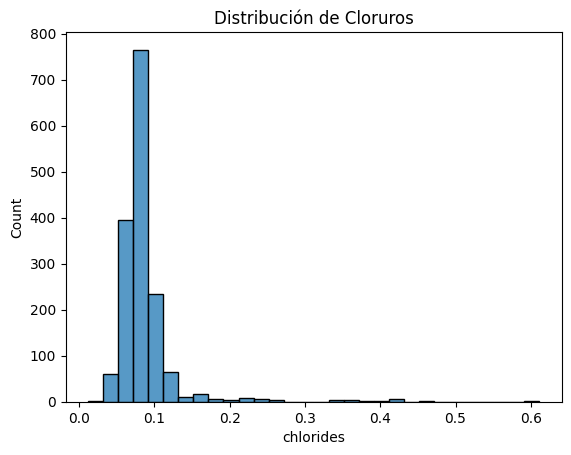

In [ ]:
sns.histplot(wine_data['chlorides'], bins=30)
plt.title('Distribución de Cloruros')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

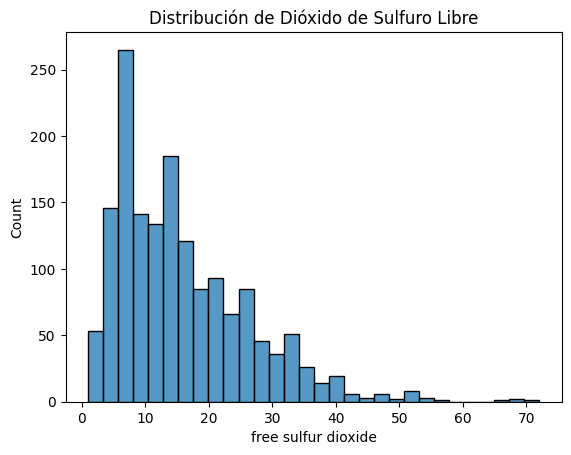

In [ ]:
sns.histplot(wine_data['free sulfur dioxide'], bins=30)
plt.title('Distribución de Dióxido de Sulfuro Libre')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

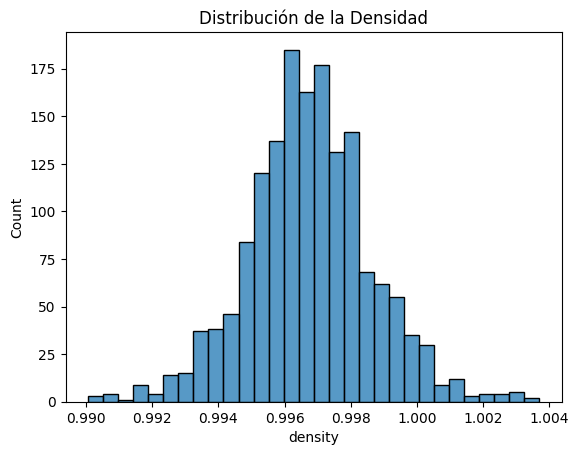

In [ ]:
sns.histplot(wine_data['density'], bins=30)
plt.title('Distribución de la Densidad')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

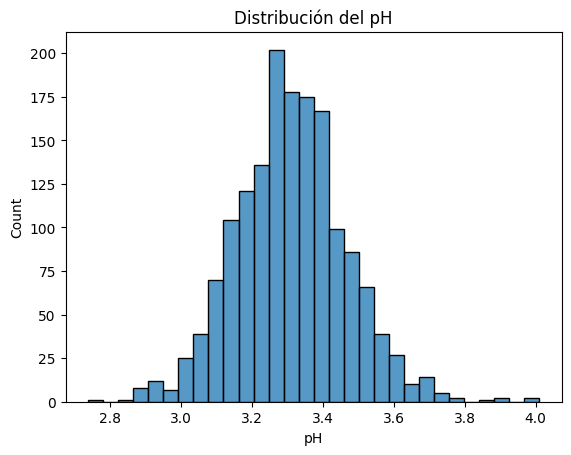

In [ ]:
sns.histplot(wine_data['pH'], bins=30)
plt.title('Distribución del pH')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

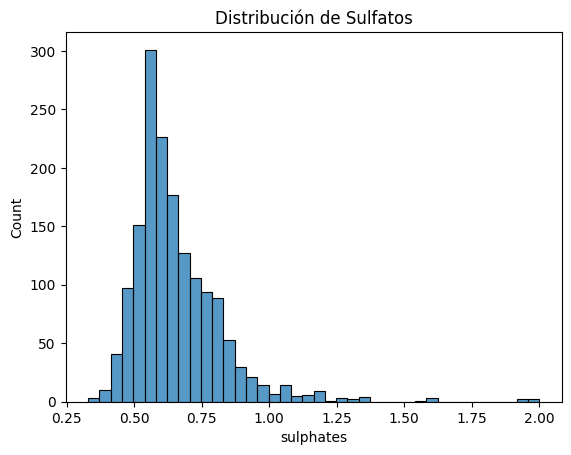

In [ ]:
sns.histplot(wine_data['sulphates'], bins=40)
plt.title('Distribución de Sulfatos')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

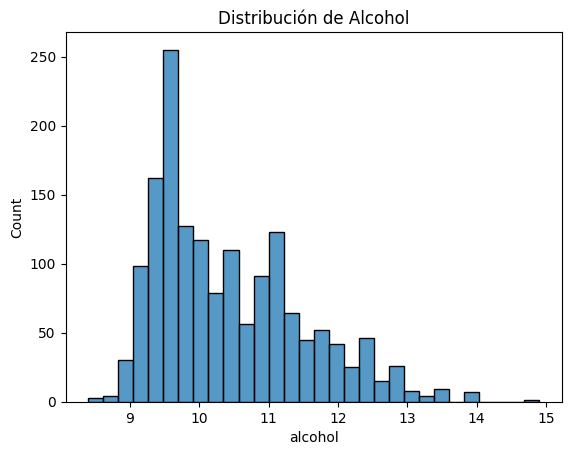

In [ ]:
sns.histplot(wine_data['alcohol'], kde=False, bins=30)
plt.title('Distribución de Alcohol')
plt.show

# Distribución de Frecuencia de la calidad del Vino

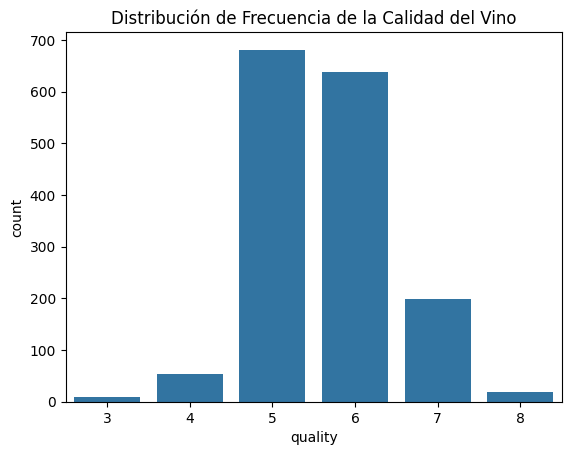

In [ ]:
sns.countplot(x='quality', data=wine_data)
plt.title('Distribución de Frecuencia de la Calidad del Vino')
plt.show()

In [ ]:
# Matriz de Correlación
correlation_matrix = wine_data.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

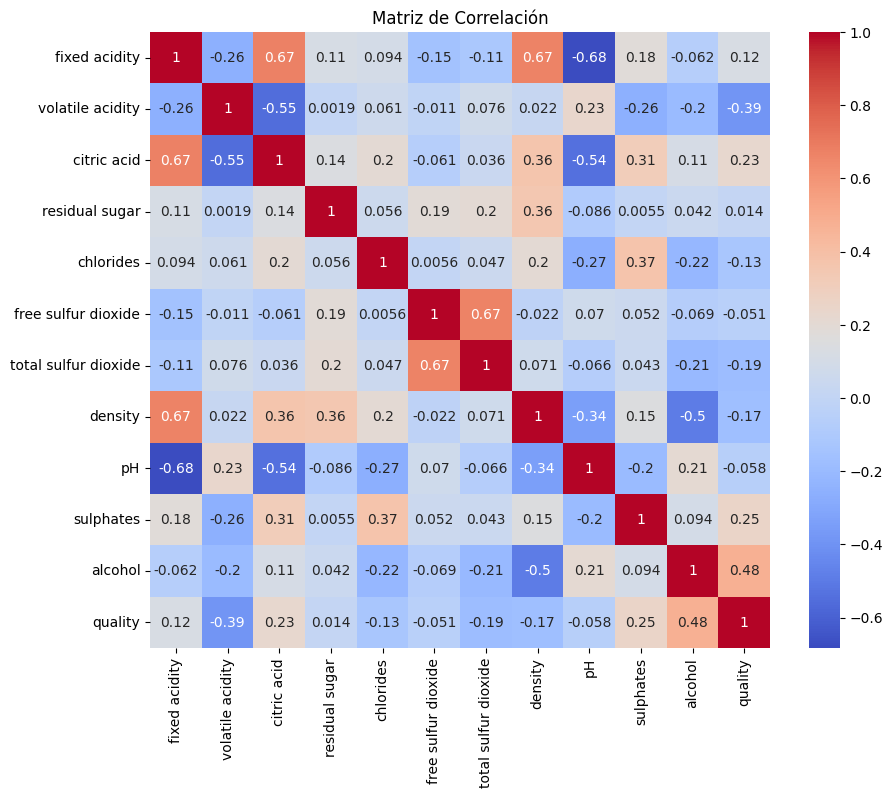

In [ ]:
# Visualización de la Matriz de Correlación en un Mapa de Calor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Distribución de la calidad del Vino a nivel porcentual
Se considerará que un lote es aceptable cuando su calidad sea mayor o igual a 6

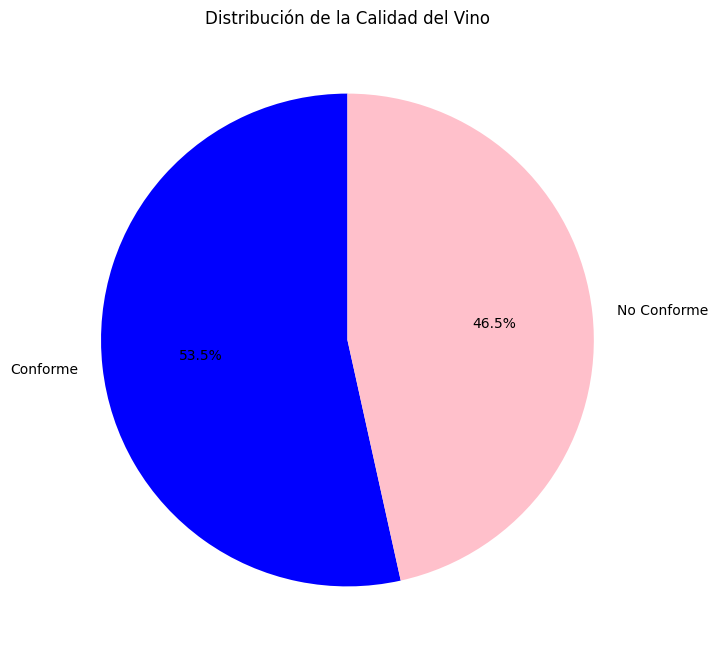

In [ ]:
# Porcentaje distribución de la Calidad del Vino
# Definimos la condición

condicion = 5

wine_data['Conformidad'] = ['Conforme' if x > condicion else 'No Conforme' for x in wine_data['quality']]

# Conteo de los lotes Conformes y No Conformes

condition_counts =  wine_data['Conformidad'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%',\
        startangle=90, colors=['blue', 'pink'])
plt.title('Distribución de la Calidad del Vino')
plt.show()

In [ ]:
#Obtención de la cantidad de valores nulos dentro de nuestra Basa de Datos
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Vista de valores Outliers

### Crear los box plot correspondientes a cada variable


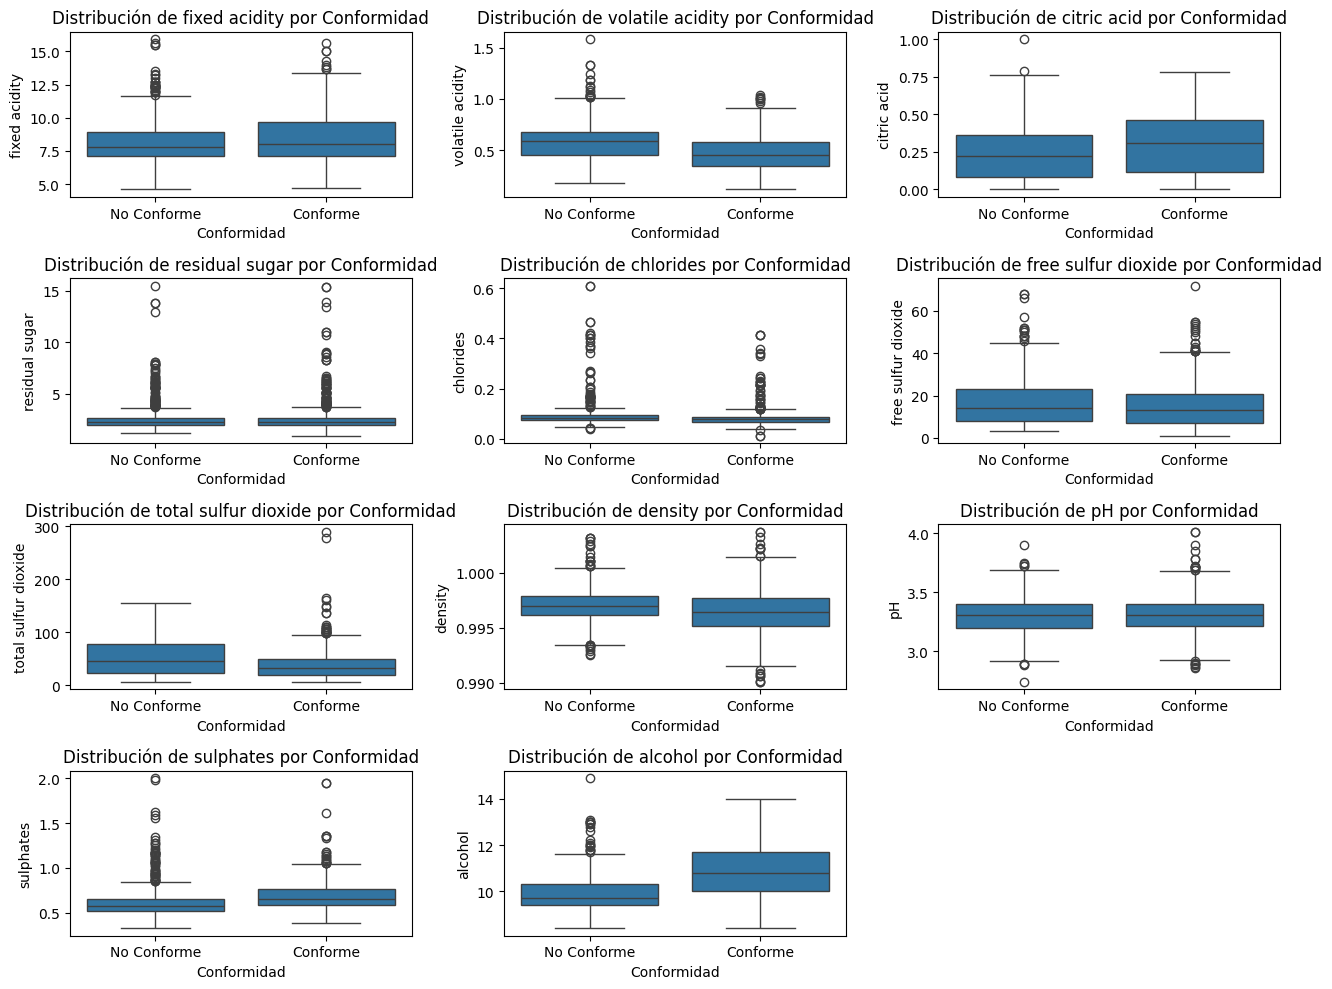

In [ ]:
numeric_features = ['fixed acidity',	'volatile acidity', 'citric acid',\
                    'residual sugar', 'chlorides', 'free sulfur dioxide',\
                    'total sulfur dioxide', 'density', 'pH', 'sulphates',\
                    'alcohol']
plt.figure(figsize=(13, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Conformidad', y=feature, data=wine_data)
    plt.xlabel('Conformidad')
    plt.ylabel(feature)
    plt.title(f'Distribución de {feature} por Conformidad')

plt.tight_layout()
plt.show()

### Distribución de cada característica respecto a la Conformidad con los estándares de Calidad del Vino

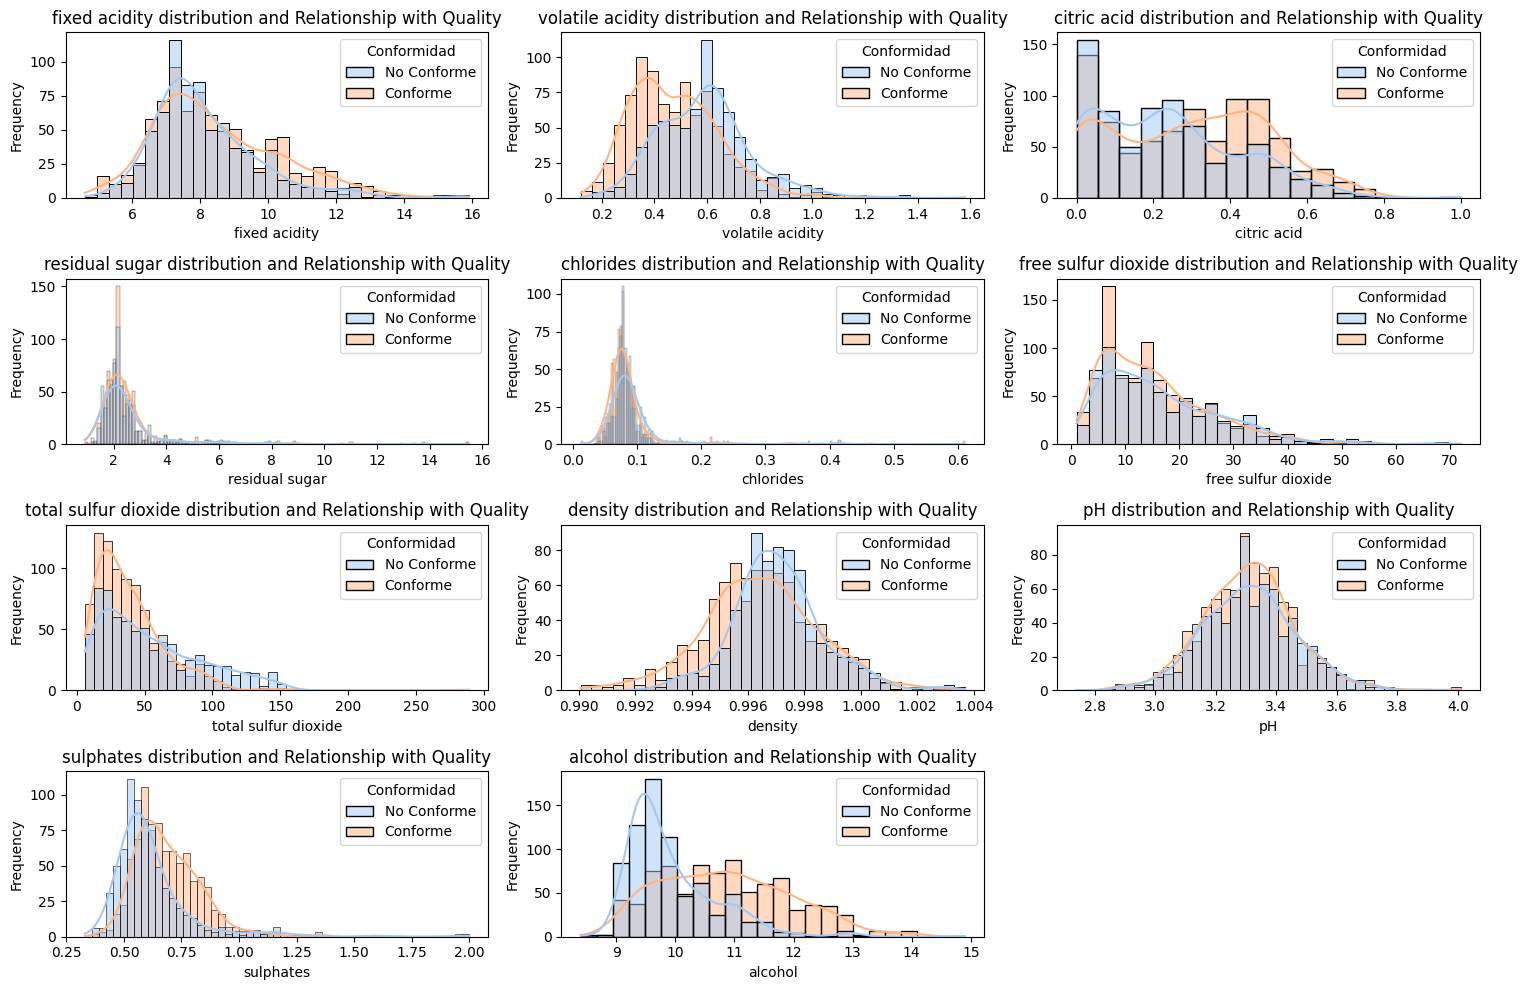

In [ ]:
plt.figure(figsize=(15, 10))

numeric_features = ['fixed acidity',	'volatile acidity', 'citric acid',\
                    'residual sugar', 'chlorides', 'free sulfur dioxide',\
                    'total sulfur dioxide', 'density', 'pH', 'sulphates',\
                    'alcohol']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=wine_data, x=feature, hue='Conformidad', kde=True, palette='pastel')
    plt.title(f'{feature} distribution and Relationship with Quality')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Preparación de los Datos

Se eliminarán los valores Outliers en la variable TOTAL SULFUR DIOXIDE debido a que el valor máximo se encuentra muy alejado del valor medio

In [ ]:
# Se utilizará el método IQR basado en quartiles para tratar los valores outliers

df = pd.DataFrame(wine_data)

# Columna en la que deseas eliminar outliers
columna_a_limpiar = 'total sulfur dioxide'

# Calcular los límites superior e inferior para la columna especificada
Q1 = df[columna_a_limpiar].quantile(0.25)
Q3 = df[columna_a_limpiar].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear un nuevo DataFrame sin los outliers en la columna especificada
wine_data_clean = df[(df[columna_a_limpiar] >= lower_bound) & \
 (df[columna_a_limpiar] <= upper_bound)]

wine_data_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Conformidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,No Conforme
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,No Conforme
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,No Conforme
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Conforme
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,No Conforme


In [ ]:
wine_data_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,8.329016,0.526558,0.269003,2.508128,0.087398,15.269106,42.997409,0.996737,3.313983,0.655920,10.442001,5.652202
std,1.760777,0.178419,0.196008,1.351175,0.047663,9.862747,27.214797,0.001887,0.154313,0.157371,1.070150,0.812345
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.635000,0.422500,2.600000,0.090000,21.000000,59.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,66.000000,122.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Al eliminar los valores outliers por encima del 1,5 IQR correspondiente a Total Sulfur Dioxide, se eliminan 55 registros.

Ahora el valor máximo de esta variable pasa de 289 a 122.

### La variable "Conformidad" es categórica y se muestra en letras, por lo que debemos convertirla a numérica

In [ ]:
# Creando un diccionario para mapear categorías a números
conformidad_mapping = {'No Conforme': 0, 'Conforme': 1}

# Utilizando .loc[] para asignar los nuevos valores
wine_data_clean.loc[:, 'Conformidad'] = df['Conformidad'].map(conformidad_mapping)

# Mostrando el DataFrame con los nuevos valores numéricos
wine_data_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Conformidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Feature Scaling
A continuación se llevarán los datos a una misma escala.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar características para escalar
features_to_scale = ['fixed acidity', 'residual sugar','free sulfur dioxide',\
                     'total sulfur dioxide', 'pH','alcohol', 'quality']

# Escalar características seleccionadas
scaler = MinMaxScaler()
wine_data_clean[features_to_scale] = scaler.fit_transform(wine_data_clean[features_to_scale])

wine_data_clean.head()


<ipython-input-26-5964cebfc856>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean[features_to_scale] = scaler.fit_transform(wine_data_clean[features_to_scale])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Conformidad
0,0.247788,0.70,0.00,0.068493,0.076,0.153846,0.241379,0.9978,0.606299,0.56,0.153846,0.4,0
1,0.283186,0.88,0.00,0.116438,0.098,0.369231,0.525862,0.9968,0.362205,0.68,0.215385,0.4,0
2,0.283186,0.76,0.04,0.095890,0.092,0.215385,0.413793,0.9970,0.409449,0.65,0.215385,0.4,0
3,0.584071,0.28,0.56,0.068493,0.075,0.246154,0.465517,0.9980,0.330709,0.58,0.215385,0.6,1
4,0.247788,0.70,0.00,0.068493,0.076,0.153846,0.241379,0.9978,0.606299,0.56,0.153846,0.4,0


### Features (X) vs Target (Y)

In [ ]:
X = wine_data_clean.drop('Conformidad', axis=1)
y = wine_data_clean['Conformidad']

In [ ]:
#Visualizar dataframe con valores de X
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.70,0.00,0.068493,0.076,0.153846,0.241379,0.9978,0.606299,0.56,0.153846,0.4
1,0.283186,0.88,0.00,0.116438,0.098,0.369231,0.525862,0.9968,0.362205,0.68,0.215385,0.4
2,0.283186,0.76,0.04,0.095890,0.092,0.215385,0.413793,0.9970,0.409449,0.65,0.215385,0.4
3,0.584071,0.28,0.56,0.068493,0.075,0.246154,0.465517,0.9980,0.330709,0.58,0.215385,0.6
4,0.247788,0.70,0.00,0.068493,0.076,0.153846,0.241379,0.9978,0.606299,0.56,0.153846,0.4


In [ ]:
#Visualizar dataframe con valores de y
y.head()

,Conformidad
0,0
1,0
2,0
3,1
4,0


### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Convertir "y" en entero
y = y.astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

X_selected = fit.transform(X_train)

## Entrenamiento Machine Learning

Para comenzar, importamos desde sklearn las métricas y modelos de clasificación con los que trabajaremos

In [ ]:
# importamos métricas
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# importar diferentes modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Entrenamos y evaluamos todos los modelos de Clasificación
# Creamos listas para almacenar resultados
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Definimos los modelos
logistic_model = LogisticRegression()
svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Lista de modelos
model_list = [logistic_model, svm_model, knn_model, tree_model, rf_model, gb_model]

# Entrenar y evaluar cada modelo usando validación cruzada
for model in model_list:
    accuracy_scores.append(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean())
    precision_scores.append(cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean())
    recall_scores.append(cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean())
    f1_scores.append(cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean())
    roc_auc_scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5).mean())

# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

# Mostrar los resultados
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.999190   0.998529  1.000000  0.999262  0.999960
1                  SVM  0.998381   1.000000  0.997015  0.998496  1.000000
2                  KNN  0.974089   0.970798  0.982123  0.976327  0.994033
3        Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
4        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
5    Gradient Boosting  1.000000   1.000000  1.000000  1.000000  1.000000


Los resultados muestran que los mejores modelos para el caso bajo estudio son: Decision Tree, Random Forest y Gradient Boosting, arrojando unas métricas perfectas.

Verificamos nuestros modelos utilizando matriz de confusión

In [ ]:
# Entrenando modelos de manera simple

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Asignamos nombre a cada y predecida por cada modelo seleccionado

y_pred_1 = tree_model.predict(X_test)
y_pred_2 = rf_model.predict(X_test)
y_pred_3 = gb_model.predict(X_test)

In [ ]:
#Importamos matriz de Confusión

from sklearn.metrics import confusion_matrix

#Matriz de confusión para Tree_model
confusion_matrix(y_test, y_pred_1)

array([[133,   0],
       [  0, 176]])

In [ ]:
#Matriz de confusión para rf_model
confusion_matrix(y_test, y_pred_2)

array([[133,   0],
       [  0, 176]])

In [ ]:
#Matriz de confusión para gb_model
confusion_matrix(y_test, y_pred_3)

array([[133,   0],
       [  0, 176]])

De ésta manera verificamos los resultados arrojados por las métricas, los 3 modelos elegidos ofrecen una predicción en la calidad del vino de 0 errores con los datos de prueba.

Para continuar elejimos  Decision Tree, debido a que arroja resultados simples e interpretables, adecuados para conjuntos de datos pequeños.

Ahora entrenamos el modelo con todos los datos

In [ ]:
best_tree_model = DecisionTreeClassifier()
best_tree_model.fit(X, y)

DecisionTreeClassifier()

Para finalizar, guardamos nuestro modelo entrenado

In [ ]:
import pickle

# save the model to disk
filename = 'dt_model.sav'
pickle.dump(best_tree_model, open(filename, 'wb'))